In [33]:
library(naturalsort)
library(data.tree)
dataDir <- '../../Data/SimOut4/'

In [3]:
flst<-list.files(dataDir) # Get list of files from directory
flst <- naturalsort(flst) # Natural sort the files
ncls <- c()
rs <- c()
k<-1
for (i in 1:(length(flst)-1)) {
    load(paste0(dataDir,flst[i]))
    ncls[[k]] <- sum(vapply(CellPop$Get('ncells'),tail,n=1L,FUN.VALUE = numeric(1)))
    rs[[k]] <- CellPop$Get('r')
    rm('CellPop')
    k <- k+1
    
}

In [4]:
rs_var <- c()
ncells_var <- c()

for (i in 1:length(rs)) {
    
    rs_var[i] <- var(rs[[i]])
    ncells_var[i] <- var(ncls[[i]])

}

In [5]:
rs_var

[1] 0.0003193143 0.0003589631 0.0002753293 0.0005295812 0.0012680497
 [6] 0.0006285290 0.0000000000 0.0000000000 0.0000000000 0.0045639795
[11] 0.0037081868 0.0049632695 0.0039950911 0.0047139037 0.0047996640

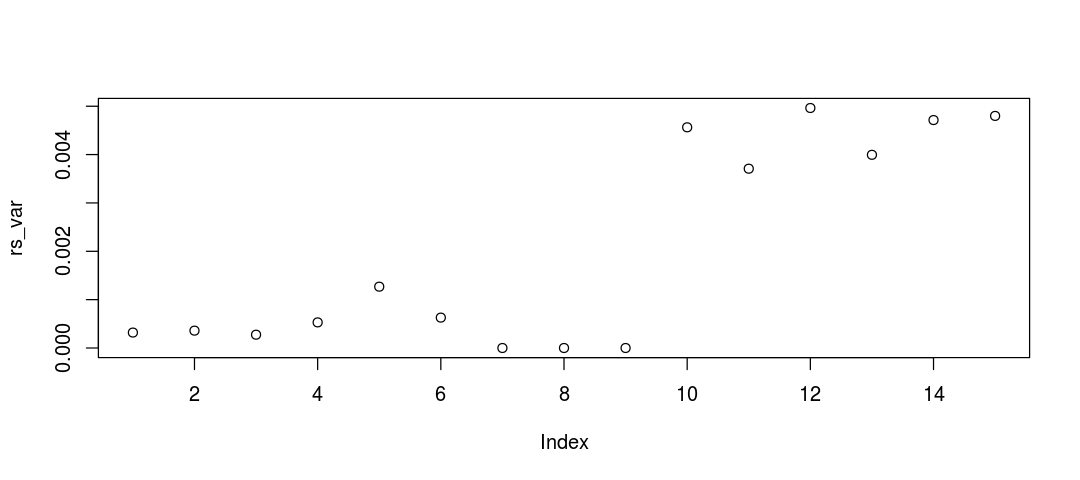

In [9]:
plot(rs_var)
options(repr.plot.width=9, repr.plot.height=4)

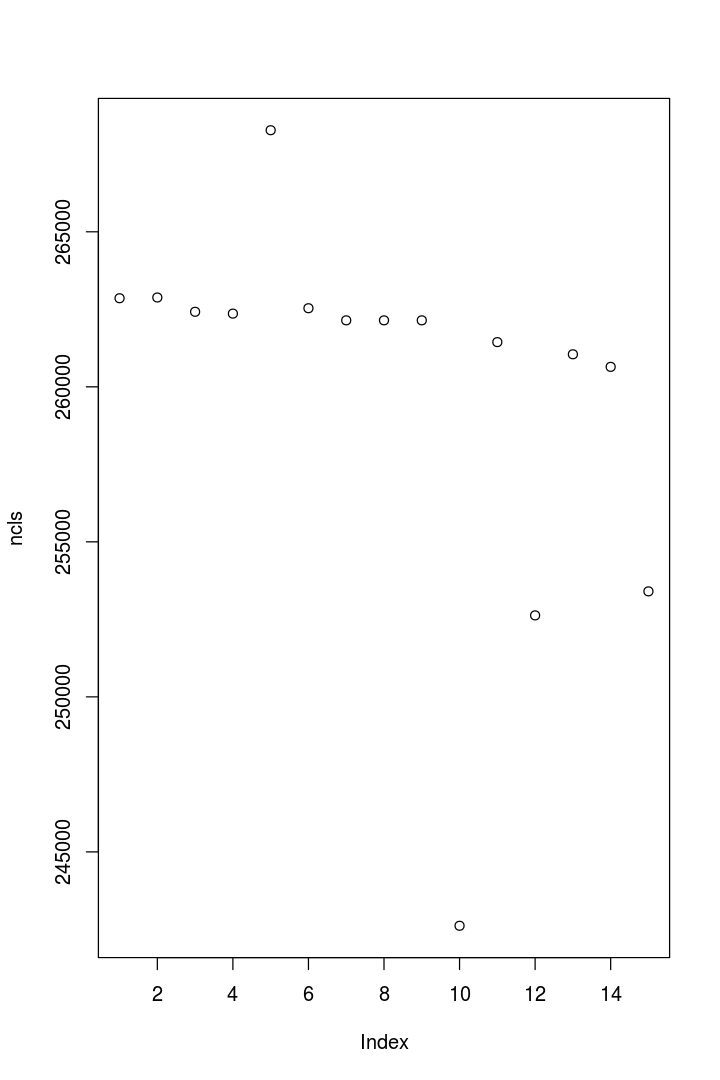

In [13]:
plot(ncls)
options(repr.plot.width=6, repr.plot.height=9)

In [21]:
load('../../Data/SimOut4/1.rda')

In [22]:
test <- CellPop$Get('tes')

In [28]:
nodes <- Traverse()

[[1]]
  A DNAStringSet instance of length 4
    width seq
[1]   124 GGAGGAGCCAAGATGGCCGAATAGGAACAGCTCC...GAGGTACCGGGTTCATCTCACTAGGGAGTGCCA
[2]  1130 GGAGGAGCCAAGATGGCCGAATAGGAACAGCTCC...GTTGAAAACTTTGAAAAAAATTTAGAAGAATGT
[3]   852 GGGAGGAGCCAAGATGGCCGAATAGGAACAGCTC...CTAACAACCAGAAAGGACATCTACACCGAAAAC
[4]   614 ACACTGTTGGTGGGACTGTAAACTAGTTCAACCA...GCACATGTACCCTAAAACTTAGAGTATAATAAA

[[2]]
[1] "chr5"  "chr21" "chr19" "chr10"

[[3]]
[1] 78165577 30733764  7323228 21645119

[[4]]
[1] "-" "+" "+" "-"


In [34]:
traversal <- Traverse(CellPop, traversal = "post-order", filterFun = function(x) x$r != 1)

In [39]:
for (node in traversal) {print(node$r)}

[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.1664
[1] 1.08
[1] 1.08
[1] 1.1664
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.1664
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.1664
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.1664
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.08
[1] 1.1664
[1] 1.08
[1] 1.08
[1] 1.0

In [45]:
# PURPOSE: Updates the gene annotation of the clone
#
# INPUT:
#   anno         (data frame) Annotation of genes (i.e. chromosome   start   end)
#   simout          (list of lists) gen_sim output
#   tes             (list of lists) Node tes
#
# OUTPUT: anno

update_anno <- function(anno, simout, tes) {
    
    tmp = mapply(append, simout, tes, SIMPLIFY = FALSE)
    for (i in 1:length(tmp[[3]])) {
        # Shift the start loci of genes with start loci beyond the insertion by the width of the L1
        anno[anno$chrom==tmp[[2]][i] & anno$start>tmp[[3]][i],]$start <- anno[anno$chrom==tmp[[2]][i] & anno$start>tmp[[3]][i],]$start + width(tmp[[1]][i])  
        # Shift the end loci of genes with start loci beyond the insertion by the width of the L1
        anno[anno$chrom==tmp[[2]][i] & anno$start>tmp[[3]][i],]$end <- anno[anno$chrom==tmp[[2]][i] & anno$start>tmp[[3]][i],]$end + width(tmp[[1]][i])  
        # Shift the end locus of any gene with only end locus beyond the insertion by the width of the L1
        anno[anno$chrom==tmp[[2]][i] & anno$end>tmp[[3]][i] & anno$start<tmp[[3]][i],]$end <- anno[anno$chrom==tmp[[2]][i] & anno$end>tmp[[3]][i] & anno$start<tmp[[3]][i],]$end + width(tmp[[1]][i])        
    }
    return(anno) 
}

In [44]:
exann <- load('../../sim-develop/data/exann.rda')
for (node in traversal) {
    nodeTes <- node$tes
    tmpAnn <- update_anno(exann,c(),nodeTes)
    
    
}